** **
### LDA Implementation

1. [Loading Data](#data_loading)
2. [Data Cleaning](#data_cleaning)
3. [Data Exploration](#data_exploration)
4. [Data Preparation](#data_preparation)
5. [LDA Model Training](#lda_model_training)
6. [Analyzing LDA Model](#model_analyzing)
7. [Prediction with Model](#model_prediction)

In [31]:
# Importing needed modules
import pandas as pd
import re
import os
from wordcloud import WordCloud
from pprint import pprint

import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora

import pickle
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import csv

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tim_stefany\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

** **
#### Step 1: Loading Data <a id="data_loading"></a>
** **

In [3]:
# Read data from task 1
data = pd.read_csv('../data/results_df_prep_all.csv')

# Print out the first rows of data
data.head()

,Unnamed: 0,Link,Place,Content,Country,Continent,sentences,tokens_full,tokens_small,tokens_full_lower,...,NE_preprocessed,sent_prepcorcessed_only_nouns,sent_without_NE,no_NE_attractions,no_NE_attractions_plain,no_NE_attractions_plain_unique,no_NE_attractions_plain_unique_dict,no_NE_attractions_categories_count,all_not_ne_possible,assignment_NE_notNE
0,0,https://www.roughguides.com/usa/hawaii/waikiki/,Waikiki,"Built on a reclaimed swamp, two miles east of ...",usa,America,"['Built on a reclaimed swamp, two miles east o...","['Built', 'on', 'a', 'reclaimed', 'swamp', ','...","[['Built', 'on', 'a', 'reclaimed', 'swamp', ',...","['built', 'on', 'a', 'reclaimed', 'swamp', ','...",...,"[['kalakaua', 'avenue'], ['mile'], ['lazy', 'd...","['build', 'reclaim', 'swamp', 'mile', 'east', ...","['build', 'reclaim', 'swamp', 'east', 'downtow...","[('swamp', 'geographic_attraction'), ('island'...","['swamp', 'island', 'city', 'sea', 'shop', 'na...","['city', 'swamp', 'narrow', 'garden', 'sea', '...","{'city': 1, 'swamp': 1, 'narrow': 1, 'garden':...","{'architectural_attraction': 1, 'entertainment...","['swamp', 'honolulu', 'waikiki', 'island', 'ci...","[('Honolulu', 'waikiki'), ('Waikiki', 'island'..."
1,1,https://www.roughguides.com/usa/florida/florid...,The Florida Keys,"Folklore, films and widespread hearsay have gi...",usa,America,"['Folklore, films and widespread hearsay have ...","['Folklore', ',', 'films', 'and', 'widespread'...","[['Folklore', ',', 'films', 'and', 'widespread...","['folklore', ',', 'films', 'and', 'widespread'...",...,"[['hour'], ['florida', 'reef'], ['key'], ['afr...","['folklore', 'film', 'hearsay', 'florida', 'ke...","['folklore', 'film', 'hearsay', 'chain', 'isla...","[('island', 'geographic_attraction'), ('fishin...","['island', 'fishing', 'dive', 'coast', 'mollus...","['bear', 'town', 'milk', 'concoction', 'fritte...","{'bear': 1, 'town': 2, 'milk': 1, 'concoction'...","{'animal_attraction': 2, 'architectural_attrac...","['island', 'cuba', 'beach', 'usa', 'fishing', ...","[('Cuba', 'beach'), ('Key West', 'usa'), ('Flo..."
2,2,https://www.roughguides.com/usa/rockies/yellow...,Yellowstone National Park,America’s oldest and easily its most famous na...,usa,America,['America’s oldest and easily its most famous ...,"['America', '’', 's', 'oldest', 'and', 'easily...","[['America', '’', 's', 'oldest', 'and', 'easil...","['america', '’', 's', 'oldest', 'and', 'easily...",...,"[['year'], ['summer'], ['canyon'], ['america']...","['america', 'park', 'yellowstone', 'park', 'at...","['attract', 'visitor', 'reason', 'sheer', 'div...","[('mountain', 'geographic_attraction'), ('mead...","['mountain', 'meadow', 'grizzly', 'bear', 'bis...","['bear', 'marmot', 'wolf', 'buffalo', 'bison',...","{'bear': 1, 'marmot': 1, 'wolf': 1, 'buffalo':...","{'animal_attraction': 10, 'geographic_attracti...","['america', 'park', 'yellowstone', 'park', 'ye...","[('America', 'park'), ('YELLOWSTONE NATIONAL P..."
3,3,https://www.roughguides.com/usa/hawaii/big-isl...,The Big Island,Although the Big Island of Hawaii could hold a...,usa,America,['Although the Big Island of Hawaii could hold...,"['Although', 'the', 'Big', 'Island', 'of', 'Ha...","[['Although', 'the', 'Big', 'Island', 'of', 'H...","['although', 'the', 'big', 'island', 'of', 'ha...",...,"[['hawaii'], ['kamehameha'], ['puuhonua', 'hon...","['island', 'hawaii', 'hold', 'island', 'room',...","['hold', 'room', 'spare', 'population', 'town'...","[('town', 'architectural_attraction'), ('fair'...","['town', 'fair', 'restaurant', 'town', 'resort...","['town', 'beachfront', 'restaurant', 'shore', ...","{'town': 4, 'beachfront': 1, 'restaurant': 1, ...","{'architectural_attraction': 5, 'entertainment...","['island', 'island', 'town', 'oahu', 'maui', '...","[('the Big Island of Hawaii', 'island'), ('Oah..."
4,4,https://www.roughguides.com/usa/great-plains/,The Great Plains Travel Guide,The rolling hills and vast grasslands of the G...,usa,America,['The rolling hills and vast grasslands of the...,

** **
#### Step 2: Data Cleaning <a id="data_cleaning"></a>
** **

In [57]:
# Add place name as title to beginning of content
data["content"] = data["Place"] + '. ' + data["Content"]

# Print out the first rows of data
data.head()

C:\Users\Henryy\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,Link,Place,Content,Country,Continent,sentences,tokens_full,tokens_small,tokens_full_lower,...,sent_prepcorcessed_only_nouns,sent_without_NE,no_NE_attractions,no_NE_attractions_plain,no_NE_attractions_plain_unique,no_NE_attractions_plain_unique_dict,no_NE_attractions_categories_count,all_not_ne_possible,assignment_NE_notNE,content
0,0,https://www.roughguides.com/usa/hawaii/waikiki/,Waikiki,"Built on a reclaimed swamp, two miles east of ...",usa,America,"['Built on a reclaimed swamp, two miles east o...","['Built', 'on', 'a', 'reclaimed', 'swamp', ','...","[['Built', 'on', 'a', 'reclaimed', 'swamp', ',...","['built', 'on', 'a', 'reclaimed', 'swamp', ','...",...,"['build', 'reclaim', 'swamp', 'mile', 'east', ...","['build', 'reclaim', 'swamp', 'east', 'downtow...","[('swamp', 'geographic_attraction'), ('island'...","['swamp', 'island', 'city', 'sea', 'shop', 'na...","['city', 'swamp', 'narrow', 'garden', 'sea', '...","{'city': 1, 'swamp': 1, 'narrow': 1, 'garden':...","{'architectural_attraction': 1, 'entertainment...","['swamp', 'honolulu', 'waikiki', 'island', 'ci...","[('Honolulu', 'waikiki'), ('Waikiki', 'island'...","Waikiki. Built on a reclaimed swamp, two miles..."
1,1,https://www.roughguides.com/usa/florida/florid...,The Florida Keys,"Folklore, films and widespread hearsay have gi...",usa,America,"['Folklore, films and widespread hearsay have ...","['Folklore', ',', 'films', 'and', 'widespread'...","[['Folklore', ',', 'films', 'and', 'widespread...","['folklore', ',', 'films', 'and', 'widespread'...",...,"['folklore', 'film', 'hearsay', 'florida', 'ke...","['folklore', 'film', 'hearsay', 'chain', 'isla...","[('island', 'geographic_attraction'), ('fishin...","['island', 'fishing', 'dive', 'coast', 'mollus...","['bear', 'town', 'milk', 'concoction', 'fritte...","{'bear': 1, 'town': 2, 'milk': 1, 'concoction'...","{'animal_attraction': 2, 'architectural_attrac...","['island', 'cuba', 'beach', 'usa', 'fishing', ...","[('Cuba', 'beach'), ('Key West', 'usa'), ('Flo...","The Florida Keys. Folklore, films and widespre..."
2,2,https://www.roughguides.com/usa/rockies/yellow...,Yellowstone National Park,America’s oldest and easily its most famous na...,usa,America,['America’s oldest and easily its most famous ...,"['America', '’', 's', 'oldest', 'and', 'easily...","[['America', '’', 's', 'oldest', 'and', 'easil...","['america', '’', 's', 'oldest', 'and', 'easily...",...,"['america', 'park', 'yellowstone', 'park', 'at...","['attract', 'visitor', 'reason', 'sheer', 'div...","[('mountain', 'geographic_attraction'), ('mead...","['mountain', 'meadow', 'grizzly', 'bear', 'bis...","['bear', 'marmot', 'wolf', 'buffalo', 'bison',...","{'bear': 1, 'marmot': 1, 'wolf': 1, 'buffalo':...","{'animal_attraction': 10, 'geographic_attracti...","['america', 'park', 'yellowstone', 'park', 'ye...","[('America', 'park'), ('YELLOWSTONE NATIONAL P...",Yellowstone National Park. America’s oldest an...
3,3,https://www.roughguides.com/usa/hawaii/big-isl...,The Big Island,Although the Big Island of Hawaii could hold a...,usa,America,['Although the Big Island of Hawaii could hold...,"['Although', 'the', 'Big', 'Island', 'of', 'Ha...","[['Although', 'the', 'Big', 'Island', 'of', 'H...","['although', 'the', 'big', 'island', 'of', 'ha...",...,"['island', 'hawaii', 'hold', 'island', 'room',...","['hold', 'room', 'spare', 'population', 'town'...","[('town', 'architectural_attraction'), ('fair'...","['town', 'fair', 'restaurant', 'town', 'resort...","['town', 'beachfront', 'restaurant', 'shore', ...","{'town': 4, 'beachfront': 1, 'restaurant': 1, ...","{'architectural_attraction': 5, 'entertainment...","['island', 'island', 'town', 'oahu', 'maui', '...","[('the Big Island of Hawaii', 'island'), ('Oah...",The Big Island. Although the Big Island of Haw...
4,4,https://www.roughguides.com/usa/great-plains/,The Great Plains Travel Guide,The rolling hills and vast grasslands of the G...,usa,America,['The rolling hills and vast grasslands of the...,"['The', 'ro

In [6]:
# Remove the not needed columns from dataframe
data = data.loc[: , ['Content']].copy()

# Print out the first rows of data
data.head()

,Content
0,"Built on a reclaimed swamp, two miles east of ..."
1,"Folklore, films and widespread hearsay have gi..."
2,America’s oldest and easily its most famous na...
3,Although the Big Island of Hawaii could hold a...
4,The rolling hills and vast grasslands of the G...


In [7]:
# Remove punctuation
data['content_processed'] = data['Content'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert text to lowercase
data['content_processed'] = data['content_processed'].map(lambda x: x.lower())

# Print out the first rows of data
data['content_processed'].head()

<>:2: DeprecationWarning: invalid escape sequence \.
<>:2: DeprecationWarning: invalid escape sequence \.
<ipython-input-7-0150757aeb47>:2: DeprecationWarning: invalid escape sequence \.
  data['content_processed'] = data['Content'].map(lambda x: re.sub('[,\.!?]', '', x))


0    built on a reclaimed swamp two miles east of d...
1    folklore films and widespread hearsay have giv...
2    america’s oldest and easily its most famous na...
3    although the big island of hawaii could hold a...
4    the rolling hills and vast grasslands of the g...
Name: content_processed, dtype: object

** **
#### Step 3: Data Exploration <a id="data_exploration"></a>
** **

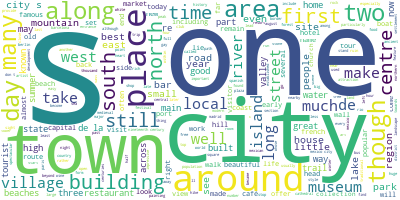

In [8]:
# Join the content of all rows together to one huge string
content_string = ','.join(list(data['content_processed'].values))

# Create a wordcloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud based on the content string
wordcloud.generate(content_string)

# Visualize the word cloud
wordcloud.to_image()

** **
#### Step 4: Data Preparation (especially for LDA analysis) <a id="data_preparation"></a>
** **

In [9]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'de', 'km', 'one', 'two'])

def sent_to_words(sentences):
    for sentence in sentences:
        yield simple_preprocess(str(sentence), deacc=True) # -> True removes punctuations

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]

#
data = data.content_processed.values.tolist()

# remove punctuation of processed content
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

# Print result
print(data_words[:1][0][:30])

['built', 'reclaimed', 'swamp', 'miles', 'east', 'downtown', 'honolulu', 'waikiki', 'nearly', 'island', 'separated', 'city', 'sea', 'ala', 'wai', 'canal', 'site', 'may', 'venerable', 'days', 'raisond', 'etre', 'rampant', 'commercialism', 'could', 'survive', 'little', 'money', 'would', 'point']


In [10]:
# Create Dictionary based on the document texts
id2word = corpora.Dictionary(data_words)

# Create Corpus (Term Document Frequency) based on the document texts
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]

# Print results
print(corpus[:1][0][:30])

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


** **
#### Step 5: LDA model training <a id="lda_model_training"></a>
** **

In [11]:
# Define number of topics for LDA Model
num_topics = 10

# Build LDA Model with corpus and dictionary of the document texts
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())

[(0,
  '0.008*"city" + 0.003*"around" + 0.003*"town" + 0.002*"south" + '
  '0.002*"place" + 0.002*"north" + 0.002*"along" + 0.002*"mexico" + '
  '0.002*"century" + 0.002*"still"'),
 (1,
  '0.005*"city" + 0.004*"town" + 0.004*"around" + 0.003*"also" + 0.003*"still" '
  '+ 0.003*"along" + 0.003*"century" + 0.003*"though" + 0.003*"la" + '
  '0.002*"day"'),
 (2,
  '0.006*"city" + 0.004*"town" + 0.003*"around" + 0.003*"also" + 0.003*"best" '
  '+ 0.002*"la" + 0.002*"south" + 0.002*"well" + 0.002*"main" + '
  '0.002*"though"'),
 (3,
  '0.007*"city" + 0.006*"town" + 0.004*"around" + 0.004*"century" + '
  '0.003*"centre" + 0.002*"also" + 0.002*"place" + 0.002*"along" + 0.002*"la" '
  '+ 0.002*"first"'),
 (4,
  '0.006*"city" + 0.003*"also" + 0.003*"along" + 0.003*"town" + 0.003*"around" '
  '+ 0.003*"south" + 0.002*"la" + 0.002*"many" + 0.002*"century" + '
  '0.002*"day"'),
 (5,
  '0.006*"lake" + 0.006*"city" + 0.003*"around" + 0.003*"also" + 0.003*"town" '
  '+ 0.003*"area" + 0.003*"along" + 0

** **
#### Step 6: Analyzing LDA model <a id="model_analyzing"></a>
** **

In [64]:
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('../results/lda_vis_prepared_' + str(num_topics))
#os.mkdir(LDAvis_data_filepath)

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        print('Saves pickle')
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    print('Opens pickle')
    LDAvis_prepared = pickle.load(f)

print('Saves html')
pyLDAvis.save_html(LDAvis_prepared, '../results/lda_vis_prepared_' + str(num_topics) + '.html')

LDAvis_prepared

C:\Users\Henryy\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Saves pickle
Opens pickle
Saves html


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.002704 -0.002876       1        1  39.009494
4     -0.001834  0.005156       2        1  18.464898
0      0.000105 -0.000319       3        1  17.895289
1      0.005846 -0.000146       4        1  13.470406
2     -0.001413 -0.001815       5        1  11.159914, topic_info=        Term        Freq       Total Category  logprob  loglift
967       de  656.000000  656.000000  Default  30.0000  30.0000
348      one  481.000000  481.000000  Default  29.0000  29.0000
4     around  384.000000  384.000000  Default  28.0000  28.0000
11      city  654.000000  654.000000  Default  27.0000  27.0000
2495      km  376.000000  376.000000  Default  26.0000  26.0000
...      ...         ...         ...      ...      ...      ...
761     area   21.279085  208.101087   Topic5  -6.2915  -0.0875
257   though   21.338138  217.893237   Topic5  -6.2887  -0.1307
727    south   20.939909  226.881131   Topic5  -6.3075  -0.1899
197     many   19.091120  214.033168   Topic5  -6.4000  -0.2241
351     park   17.998615  181.302724   Topic5  -6.4589  -0.1170

[439 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
15540      1  0.275226    aeolian
15540      2  0.275226    aeolian
15540      4  0.275226    aeolian
15540      5  0.275226    aeolian
15541      1  0.449866   aeolians
...      ...       ...        ...
6132       5  0.259424  zacatecas
1315       1  0.482858       zion
1315       3  0.321905       zion
1315       4  0.160953       zion
7351       1  0.489866    zoticus

[981 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 1, 2, 3])

** **
#### Step 7: Predicting with LDA model <a id="model_prediction"></a>
** **

In [29]:
# calculate score for each topic per document
def get_doc_topic(corpus, model):
    doc_topic = []
    for doc in corpus:
        doc_topic.append(model.__getitem__(doc, eps=0))
    return doc_topic

matrix = get_doc_topic(corpus, lda_model)
matrix

[[(0, 0.9908889),
  (1, 0.00101234),
  (2, 0.0010123093),
  (3, 0.0010123922),
  (4, 0.0010123323),
  (5, 0.0010123325),
  (6, 0.0010123858),
  (7, 0.0010123568),
  (8, 0.0010123223),
  (9, 0.001012319)],
 [(0, 0.00040963796),
  (1, 0.00040965143),
  (2, 0.00040964346),
  (3, 0.015089178),
  (4, 0.0004096383),
  (5, 0.0004096414),
  (6, 0.98163366),
  (7, 0.00040965652),
  (8, 0.0004096447),
  (9, 0.00040963545)],
 [(0, 0.99214786),
  (1, 0.00087247207),
  (2, 0.0008724292),
  (3, 0.0008724745),
  (4, 0.0008724374),
  (5, 0.00087252224),
  (6, 0.0008724374),
  (7, 0.00087249646),
  (8, 0.0008724306),
  (9, 0.00087245024)],
 [(0, 0.0002779807),
  (1, 0.00027797668),
  (2, 0.00027797875),
  (3, 0.37894854),
  (4, 0.0002779844),
  (5, 0.00027799417),
  (6, 0.00027798244),
  (7, 0.6188276),
  (8, 0.00027797936),
  (9, 0.0002779728)],
 [(0, 0.99248344),
  (1, 0.00040212375),
  (2, 0.00040210207),
  (3, 0.00040212553),
  (4, 0.00040213316),
  (5, 0.00040212195),
  (6, 0.0042995545),
  (7, 0.

In [30]:
# reformat output to match matrix from LSA approach
matrix_df = pd.DataFrame(matrix)
matrix_df = matrix_df.apply(lambda x: [y[1] for y in x])
matrix_df

,0,1,2,3,4,5,6,7,8,9
0,0.990889,0.001012,0.001012,0.001012,0.001012,0.001012,0.001012,0.001012,0.001012,0.001012
1,0.000410,0.000410,0.000410,0.015089,0.000410,0.000410,0.981634,0.000410,0.000410,0.000410
2,0.992148,0.000872,0.000872,0.000872,0.000872,0.000873,0.000872,0.000872,0.000872,0.000872
3,0.000278,0.000278,0.000278,0.378949,0.000278,0.000278,0.000278,0.618828,0.000278,0.000278
4,0.992483,0.000402,0.000402,0.000402,0.000402,0.000402,0.004300,0.000402,0.000402,0.000402
...,...,...,...,...,...,...,...,...,...,...
95,0.000095,0.000095,0.000095,0.000095,0.962980,0.000095,0.000095,0.036257,0.000095,0.000095
96,0.000498,0.000498,0.000498,0.000498,0.000498,0.000498,0.000498,0.000498,0.995517,0.000498
97,0.781252,0.000378,0.000378,0.215723,0.000378,0.000378,0.000378,0.000378,0.000378,0.000378
98,0.000136,0.000136,0.000136,0.000136,0.000136,0.000136,0.000413,0.000136,0.000136,0.998497


In [34]:
# safe matrix as csv
matrix_df.to_csv('lda_example_matrix.csv', index=False, header=False)